# Bank Marketing Data- Solution by Decision Tree 

Aim:
The aim of this attempt is to predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [3]:
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [7]:
bank.groupby('job').size()

job
admin.           1334
blue-collar      1944
entrepreneur      328
housemaid         274
management       2566
retired           778
self-employed     405
services          923
student           360
technician       1823
unemployed        357
unknown            70
dtype: int64

In [10]:
bank.shape

(11162, 17)

In [14]:
bank['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [18]:
# Check if the data set contains any null values - Nothing found!
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [19]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


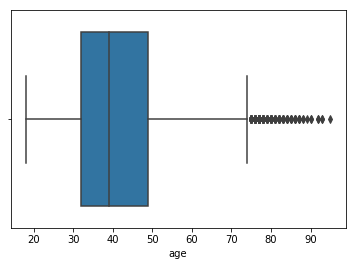

In [20]:
#boxplot for age
sns.boxplot(x=bank["age"])

C:\Users\UTSAV\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


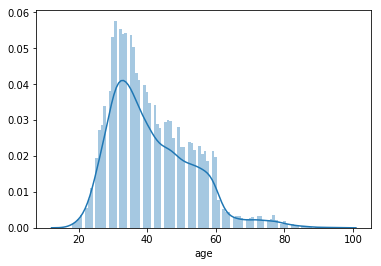

In [26]:
# Distribution of Age
sns.distplot(bank.age, bins=100)

C:\Users\UTSAV\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


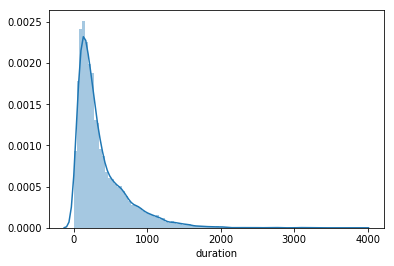

In [28]:
sns.distplot(bank.duration, bins=100)


In [31]:
bank_data=bank.copy()

In [61]:
jobs=['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student']
for j in jobs:
    print("{:15}  :  {:5}".format(j,len(bank_data[(bank_data.deposit=="yes")&(bank_data.job==j)])))

admin.           :    631
technician       :    840
services         :    369
management       :   1301
retired          :    516
blue-collar      :    708
unemployed       :    202
entrepreneur     :    123
housemaid        :    109
unknown          :     34
self-employed    :    187
student          :    269


In [43]:
bank_data[bank_data['deposit']=="yes"].groupby('job').size()

job
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34
dtype: int64

In [59]:
for j in jobs:
    print(len(bank_data[(bank_data.deposit=="yes")&(bank_data.job==j)]))


631
840
369
1301
516
708
202
123
109
34
187
269


In [53]:
len(bank_data[(bank_data.deposit=="yes")&(bank_data.job=="technician")])

840

In [55]:
len(bank_data)

11162

In [56]:
bank.shape

(11162, 17)

In [62]:
#Different types od job categories and their counts
bank_data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [63]:
# Combine similar jobs into categiroes
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [64]:
# New value counts
bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [65]:
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [66]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [ ]:
bank_data.drop('contact', axis=1,inplace=True)

------------------------------ default ------------------------------


In [70]:
#values for default : yes/no
bank_data['default_cat']=bank_data['default'].map({'yes':1,'no':0})
bank_data.drop('default', axis=1,inplace=True)

In [74]:
bank_data.head(2)

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat
0,59,white-collar,married,secondary,2343,yes,no,5,may,1042,1,-1,0,unknown,yes,0
1,56,white-collar,married,secondary,45,no,no,5,may,1467,1,-1,0,unknown,yes,0


----------------------loan---------------------

In [75]:
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

In [69]:
bank_data.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [76]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [77]:
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

------------------------------ pdays ------------------------------

In [78]:
bank_data.pdays.value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
 183      73
 184      52
 94       42
 93       41
 95       39
 87       34
 90       32
 98       31
 185      30
 187      28
 96       26
 97       26
 189      24
 188      24
 99       22
 105      22
 179      21
 175      20
 186      20
 370      19
 180      19
 196      19
 88       19
 89       18
 195      18
        ... 
 529       1
 481       1
 449       1
 403       1
 435       1
 459       1
 36        1
 476       1
 444       1
 428       1
 420       1
 404       1
 268       1
 228       1
 108       1
 68        1
 44        1
 20        1
 475       1
 12        1
 4         1
 771       1
 651       1
 603       1
 595       1
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

In [79]:
bank_data.pdays.max()

854

In [80]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
#       -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [81]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [94]:
bank_data.pdays.head(5)

0    10000
1    10000
2    10000
3    10000
4    10000
Name: pdays, dtype: int64

In [83]:
tempdata= {'c1':[1,2,3,1,1,1,1,1],'c2':[23,23,23,23,23,23,23,9] }
df=pd.DataFrame(data=tempdata)
df

,c1,c2
0,1,23
1,2,23
2,3,23
3,1,23
4,1,23
5,1,23
6,1,23
7,1,9


In [87]:
df[df['c1']==1]['c1']=10000

C:\Users\UTSAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
df.loc[df['c1'] == 1,'c1']=1000
df.head(2)

,c1,c2
0,10000,23
1,2,23


In [95]:
bank_data.loc[1]

age                      56
job            white-collar
marital             married
education         secondary
balance                  45
housing                  no
duration               1467
campaign                  1
pdays                 10000
previous                  0
poutcome            unknown
default_cat               0
loan_cat                  0
deposit_cat               1
Name: 1, dtype: object

In [96]:
bank_data.head()

,age,job,marital,education,balance,housing,duration,campaign,pdays,previous,poutcome,default_cat,loan_cat,deposit_cat
0,59,white-collar,married,secondary,2343,yes,1042,1,10000,0,unknown,0,0,1
1,56,white-collar,married,secondary,45,no,1467,1,10000,0,unknown,0,0,1
2,41,technician,married,secondary,1270,yes,1389,1,10000,0,unknown,0,0,1
3,55,pink-collar,married,secondary,2476,yes,579,1,10000,0,unknown,0,0,1
4,54,white-collar,married,tertiary,184,no,673,2,10000,0,unknown,0,0,1


In [98]:
#create a new column: recent_pdays
bank_data['recent_days']=1/bank_data['pdays']
bank_data.drop('pdays',axis=1,inplace=True)
bank_data.tail()

,age,job,marital,education,balance,housing,duration,campaign,previous,poutcome,default_cat,loan_cat,deposit_cat,recent_days
11157,33,blue-collar,single,primary,1,yes,257,1,0,unknown,0,0,0,0.000100
11158,39,pink-collar,married,secondary,733,no,83,4,0,unknown,0,0,0,0.000100
11159,32,technician,single,secondary,29,no,156,2,0,unknown,0,0,0,0.000100
11160,43,technician,married,secondary,0,no,9,2,5,failure,0,1,0,0.005814
11161,34,technician,married,secondary,0,no,628,1,0,unknown,0,0,0,0.000100


------------------------------ housing ------------------------------¶

In [100]:
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

In [101]:
bank_data.tail(2)

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,loan_cat,deposit_cat,recent_days,housing_cat
11160,43,technician,married,secondary,0,9,2,5,failure,0,1,0,0.005814,0
11161,34,technician,married,secondary,0,628,1,0,unknown,0,0,0,0.000100,0


------------------------------ Convert to dummy values -----------------------------

In [111]:
# Convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'],
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

In [113]:
bank_with_dummies.head()

,age,balance,duration,campaign,previous,default_cat,loan_cat,deposit_cat,recent_days,housing_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,0,1,0.0001,1,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,1,0.0001,0,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,0,1,0.0001,1,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,0,1,0.0001,1,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,1,0.0001,0,...,0,1,0,0,0,1,0,0,0,1


In [114]:
bank_with_dummies.shape

(11162, 27)

In [115]:
bank_with_dummies.describe()

,age,balance,duration,campaign,previous,default_cat,loan_cat,deposit_cat,recent_days,housing_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.130801,0.473840,0.003124,0.473123,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.337198,0.499338,0.030686,0.499299,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.001919,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


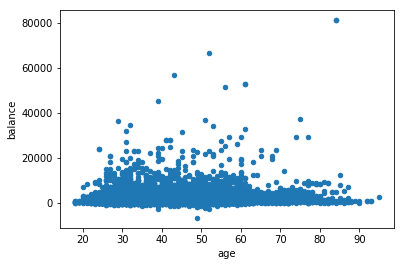

In [116]:
#Scatterplot showing age and balance
bank_with_dummies.plot(kind='scatter',x='age',y='balance')
# Across all ages, majority of people have savings of less than 20000.

In [123]:
bank_with_dummies.balance.value_counts()

 0        774
 1         39
 3         35
 2         34
 4         29
 5         27
 19        20
 8         19
 62        18
 67        17
 61        17
 21        17
 46        17
 6         17
 22        16
 205       16
 154       16
 16        16
 294       16
 23        15
 108       15
 292       15
 131       15
 30        15
 136       15
 102       15
 127       15
 223       15
 25        14
 94        14
         ... 
 4497       1
-994        1
-405        1
 2458       1
 4513       1
 2466       1
 3031       1
 11219      1
-978        1
 4545       1
-970        1
 2506       1
 966        1
 958        1
-477        1
 4577       1
 2530       1
-493        1
-938        1
-509        1
 5028       1
 2570       1
-930        1
 2578       1
 531        1
 4641       1
 2975       1
 918        1
 2959       1
 7561       1
Name: balance, Length: 3805, dtype: int64

In [124]:
bank_with_dummies.head(2)

,age,balance,duration,campaign,previous,default_cat,loan_cat,deposit_cat,recent_days,housing_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,0,1,0.0001,1,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,1,0.0001,0,...,0,1,0,0,1,0,0,0,0,1


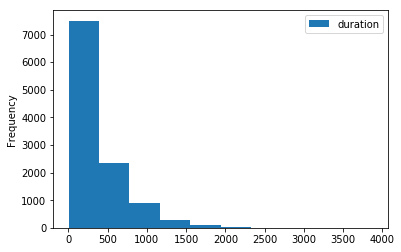

In [125]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

In [126]:
# Analysis on people who sign up for a term deposite¶

In [127]:
bank_with_dummies[bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,loan_cat,deposit_cat,recent_days,housing_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.091511,1.0,0.004238,0.365854,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.288361,0.0,0.035686,0.481714,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,0.000000,1.0,0.005128,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
# People signed up to a term deposite having a personal loan (loan_cat) and housing loan (housing_cat)

len(bank_with_dummies[(bank_with_dummies.deposit_cat==1) &
                      (bank_with_dummies.loan_cat==1) & (bank_with_dummies.housing_cat==1)])

265

In [138]:
# People signed up to a term deposite with a credit default 
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.default_cat ==1)])

52

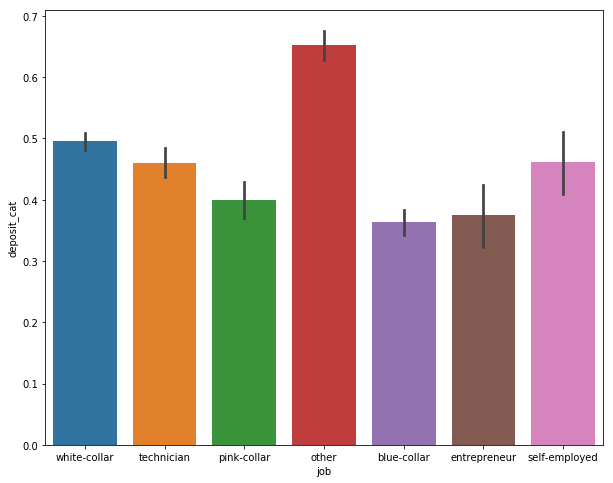

In [139]:
#bar chart of job vs deposit

plt.figure(figsize=(10,8))
sns.barplot(x='job',y='deposit_cat',data=bank_data)

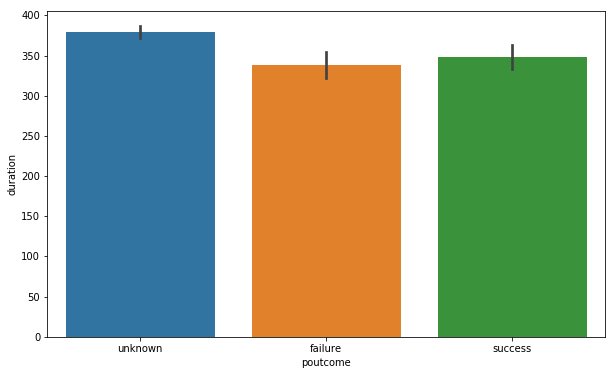

In [140]:
# Bar chart of "previous outcome" Vs "call duration"

plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

# Classification Starts

In [141]:
# make a copy
bankcl = bank_with_dummies

In [143]:
corr=bankcl.corr()
corr

,age,balance,duration,campaign,previous,default_cat,loan_cat,deposit_cat,recent_days,housing_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.031418,0.034901,0.019102,-0.168700,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.084589,0.081129,-0.004379,-0.077092,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,-0.001914,0.451919,-0.014868,0.035051,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.034722,-0.128081,-0.026296,0.006660,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.022668,0.139867,0.122076,-0.000840,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.076434,-0.040680,-0.011290,0.011076,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,1.000000,-0.110580,-0.012697,0.076761,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.110580,1.000000,0.034457,-0.203888,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_days,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.012697,0.034457,1.000000,-0.029350,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,0.076761,-0.203888,-0.029350,1.000000,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375


Text(0.5,1,'Heatmap of Correlation Matrix')

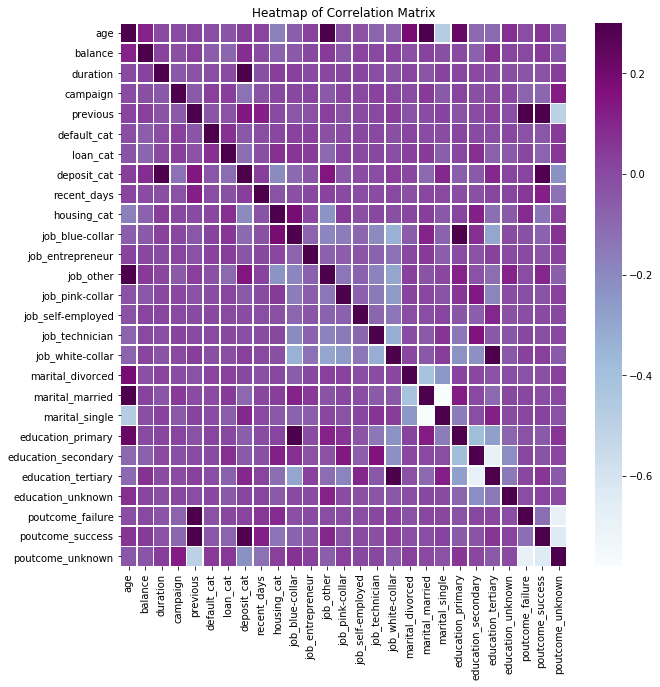

In [147]:
#Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap="BuPu",vmax=0.3, linewidths=.5,)
plt.title('Heatmap of Correlation Matrix')

In [154]:
cor_deposit_df=corr['deposit_cat']
cor_deposit_df.head(2)

age        0.034901
balance    0.081129
Name: deposit_cat, dtype: float64

# Building the Data Model

In [156]:
data_drop_deposit=bankcl.drop('deposit_cat',axis=1)

In [157]:
label=bankcl.deposit_cat
data_train,data_test,label_train,label_test=train_test_split(data_drop_deposit,label,test_size=0.2,random_state=50)

In [159]:
#Decision tree with depth 2
dt2=tree.DecisionTreeClassifier(random_state=1,max_depth=2)
dt2.fit(data_train,label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [160]:
dt2_score_train=dt2.score(data_train,label_train)
print("training score: ",dt2_score_train)
dt2_score_test=dt2.score(data_test,label_test)
print("Testing Score : ",dt2_score_test)

training score:  0.7285250307985217
Testing Score :  0.7268248992386923


In [161]:
# Decision tree with depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(data_train, label_train)
dt3_score_train = dt3.score(data_train, label_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(data_test, label_test)
print("Testing score: ",dt3_score_test)

Training score:  0.770411020271027
Testing score:  0.7572772055530677


In [162]:
# Decision tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7885541494008288
Testing score:  0.774294670846395


In [163]:
# Decision tree with depth = 4
dt5 = tree.DecisionTreeClassifier(random_state=1, max_depth=5)
dt5.fit(data_train, label_train)
dt5_score_train = dt5.score(data_train, label_train)
print("Training score: ",dt5_score_train)
dt5_score_test = dt5.score(data_test, label_test)
print("Testing score: ",dt5_score_test)

Training score:  0.7976257139657297
Testing score:  0.7760859829825347


In [164]:
# Decision tree with depth = 6
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.8080412140217269
Testing score:  0.7796686072548141


In [165]:
# Decision tree: To the full depth
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.7344379758172862


In [166]:
#Compare Training and Testing scores for various tree depths used

In [168]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7285250307985217   0.7268248992386923
3         0.770411020271027   0.7572772055530677
4        0.7885541494008288    0.774294670846395
6        0.8080412140217269   0.7796686072548141
max                     1.0   0.7344379758172862


It could be seen that, higher the depth, training score increases and matches perfects with the training data set. However higher the depth the tree goes, it overfit to the training data set. So it's no use keep increasing the tree depth. According to above observations, tree with a depth of 2 seems more reasonable as both training and test scores are reasonably high.

In [175]:
bankcl.shape

(11162, 27)

In [187]:
# Let's generate the decision tree for depth = 2
# Create a feature vector
features = bankcl.columns
features_new=features.drop(['deposit_cat'])
features_new

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'default_cat',
       'loan_cat', 'recent_days', 'housing_cat', 'job_blue-collar',
       'job_entrepreneur', 'job_other', 'job_pink-collar', 'job_self-employed',
       'job_technician', 'job_white-collar', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'poutcome_failure', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [188]:
features_new.shape

(26,)

In [189]:
bankcl.head(1)

,age,balance,duration,campaign,previous,default_cat,loan_cat,deposit_cat,recent_days,housing_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,0,1,0.0001,1,...,0,1,0,0,1,0,0,0,0,1


In [190]:
#to generate the digraph Tree.
tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=features_new)

In [191]:
# Two classes: 0 = not signed up,  1 = signed up
dt2.classes_

array([0, 1], dtype=int64)

In [195]:
data_drop_deposit.shape

(11162, 26)

In [193]:
# Create a feature vector
features = data_drop_deposit.columns.tolist()
# .tolist() remember this function
features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_cat',
 'loan_cat',
 'recent_days',
 'housing_cat',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [199]:
#investigate most important feature with depth =2
dt2=tree.DecisionTreeClassifier(random_state=1,max_depth=2)

#fit the decision tree classifier 
dt2.fit(data_train,label_train)

fi=dt2.feature_importances_

l=len(features)
for i in range(0,l):
    print('{:<20}  {:5} '.format(features[i],fi[i]))


age                     0.0 
balance                 0.0 
duration              0.849306123902405 
campaign                0.0 
previous                0.0 
default_cat             0.0 
loan_cat                0.0 
recent_days             0.0 
housing_cat             0.0 
job_blue-collar         0.0 
job_entrepreneur        0.0 
job_other               0.0 
job_pink-collar         0.0 
job_self-employed       0.0 
job_technician          0.0 
job_white-collar        0.0 
marital_divorced        0.0 
marital_married         0.0 
marital_single          0.0 
education_primary       0.0 
education_secondary     0.0 
education_tertiary      0.0 
education_unknown       0.0 
poutcome_failure        0.0 
poutcome_success      0.15069387609759496 
poutcome_unknown        0.0 


# Predictions

In [200]:
data_drop_deposit.head()

,age,balance,duration,campaign,previous,default_cat,loan_cat,recent_days,housing_cat,job_blue-collar,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,0,0.0001,1,0,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0.0001,0,0,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,0,0.0001,1,0,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,0,0.0001,1,0,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0.0001,0,0,...,0,1,0,0,0,1,0,0,0,1


In [201]:
#according to the feature importance results, most important feature is the "Duration"
#Lets calculate statistics on duration
print("Mean Duration : ",data_drop_deposit.duration.mean())
print("Max Duration : ",data_drop_deposit.duration.max())
print("Min Duration : ",data_drop_deposit.duration.min())

Mean Duration :  371.99381831213043
Max Duration :  3881
Min Duration :  2


In [207]:
temparray=np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)
temparray
temparray.shape

(1, 26)

In [212]:
t1=pd.DataFrame(np.zeros((1,26)))
t1.shape

(1, 26)

In [218]:
t1[[2]]=371

In [219]:
t1

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,371.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
print(dt2.predict_proba(t1))
print(dt2.predict(t1))

[[0.48515568 0.51484432]]
[1]


In [227]:
#currently t2=t1 .
t2=t1
print("t1 :",t1)
print("t2 : ",t2)
print("###################")
print("If we assign t2=t1 and change anything in t2 , then it will reflect its change in t1 also ")
print("see the proof below : ")
print("executing t2[[2]]=3881")
t2[[2]]=3881
print("t1 :",t1)
print("t2 : ",t2)
print("###################")
print("Thus we need to create copy of dataframe and then use it")
print("t1 and  t2 both set to 371")
t2[[2]]=371
print("t1 :",t1)
print("t2 : ",t2)
print("###################")
print("Doing t2=t1.copy() and then assigning t2[[2]]=3881")
t2=t1.copy()
t2[[2]]=3881
print("Done")
print("t1 :",t1)
print("t2 : ",t2)

t1 :     0    1      2    3    4    5    6    7    8    9  ...    16   17   18  \
0  0.0  0.0  371.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

    19   20   21   22   23   24   25  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 26 columns]
t2 :      0    1      2    3    4    5    6    7    8    9  ...    16   17   18  \
0  0.0  0.0  371.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

    19   20   21   22   23   24   25  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 26 columns]
###################
If we assign t2=t1 and change anything in t2 , then it will reflect its change in t1 also 
see the proof below : 
executing t2[[2]]=3881
t1 :     0    1       2    3    4    5    6    7    8    9  ...    16   17   18  \
0  0.0  0.0  3881.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

    19   20   21   22   23   24   25  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 26 columns]
t2 :      0    1       2    3    4    5    6    7    8   

In [228]:
print(dt2.predict_proba(t2))
print(dt2.predict(t2))

[[0.19295499 0.80704501]]
[1]


In [230]:
bank_with_dummies[(bank_with_dummies.poutcome_success==1)].head()

,age,balance,duration,campaign,previous,default_cat,loan_cat,deposit_cat,recent_days,housing_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
899,56,589,518,1,2,0,0,1,0.006803,1,...,0,1,0,0,1,0,0,0,1,0
951,53,2269,1091,2,1,0,0,1,0.006667,0,...,0,1,0,0,0,1,0,0,1,0
985,46,3354,522,1,1,0,0,1,0.005747,1,...,1,0,0,0,1,0,0,0,1,0
994,40,3352,639,2,1,0,0,1,0.037037,1,...,0,1,0,0,0,1,0,0,1,0
1151,31,1331,182,2,1,0,0,1,0.011111,0,...,0,1,0,0,0,1,0,0,1,0


In [232]:
bank_with_dummies[(bank_with_dummies.poutcome_success==1)].shape

(1071, 27)

In [234]:
#Make predictions on the test set 
preds=dt2.predict(data_test)
#Calculate Accuracy
print("\n Accuracy Score : \n{}".format(metrics.accuracy_score(label_test,preds)))


 Accuracy Score : 
0.7268248992386923


In [246]:
# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

probs

array([0.80704501, 0.16331361, 0.51484432, ..., 0.16331361, 0.51484432,
       0.16331361])

In [247]:
# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Area Under Curve: 
0.7880265888143609
